In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification, AutoTokenizer

In [5]:
processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")
model = AutoModelForZeroShotImageClassification.from_pretrained("openai/clip-vit-base-patch32")

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [85]:
from densely_captioned_images.dataset.impl import get_clip_ready_ds, DenseCaptionedDataset
train_ds: DenseCaptionedDataset = get_clip_ready_ds('train', count=10)
valid_ds: DenseCaptionedDataset = get_clip_ready_ds('valid', count=10)

Loading Dense Caps::  11%|█         | 11/98 [00:00<00:01, 53.22it/s]


In [137]:
def plot_image(processed_image, clip_preprocesed=True):
    if clip_preprocesed:
        image_np = processed_image.numpy()
    else:
        image_np = processed_image

    # CLIP processor normalizes and resizes images, so we need to denormalize
    mean = np.array([0.48145466, 0.4578275, 0.40821073]).reshape(-1, 1, 1)
    std = np.array([0.26862954, 0.26130258, 0.27577711]).reshape(-1, 1, 1)

    if clip_preprocesed:
        # Denormalize
        image_np = std * image_np + mean
        # Convert from channels first to channels last
        # Clip values to [0, 1] range
        image_np = np.clip(image_np, 0, 1)
        image_np = np.transpose(image_np, (1, 2, 0))

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image_np)
    plt.axis('off')
    plt.show()
    

In [138]:
train_ds[0].keys()

dict_keys(['input_ids', 'attention_mask', 'negative_input_ids', 'negative_attention_mask', 'pixel_values'])

In [139]:
type(train_ds)

densely_captioned_images.dataset.impl.DenseCaptionedDataset

In [140]:
ind = 3

In [141]:
caption = train_ds[ind]['input_ids']
caption_attn = train_ds[ind]['attention_mask']
text_caption = tokenizer.batch_decode(caption, attention_mask=caption_attn, skip_special_tokens=True)
print(text_caption)

negative_caption = train_ds[ind]['negative_input_ids']
negative_caption_attn = train_ds[ind]['negative_attention_mask']
text_negative_caption = tokenizer.batch_decode(negative_caption, attention_mask=negative_caption_attn, skip_special_tokens=True)
print(text_negative_caption)

['a double wide column with the base of a large indoor planter on the right .']
['a large indoor planter with the base of a double wide column on the right .']


In [142]:
type(train_ds[ind]['pixel_values'])

torch.Tensor

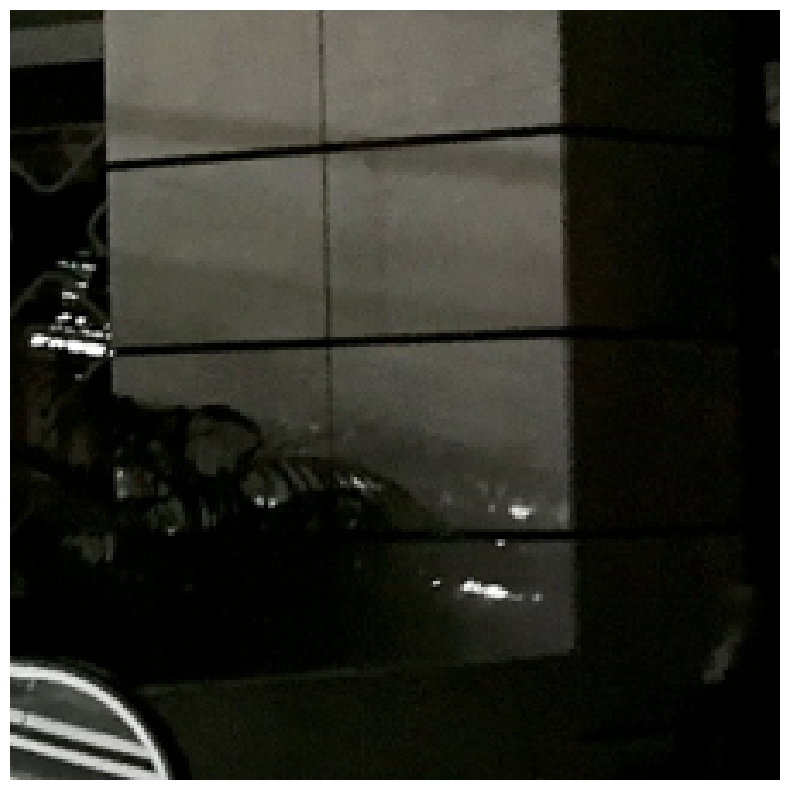

In [143]:
plot_image(train_ds[ind]['pixel_values'].squeeze(), clip_preprocesed=True)

In [152]:
from densely_captioned_images.dataset.dense_image import DenseCaptionedImage

# Load an image by its ID
dci = DenseCaptionedImage(img_id=987)  # Replace with actual image ID

# Get the image as a numpy array
image = dci.get_image()

# Get the full formatted description
full_description = dci.get_formatted_complete_description()[0]['caption']

# Alternatively, get base caption and extended caption
base_caption = dci.get_base_caption()[0]['caption']  # Short caption
extended_caption = dci.get_extended_caption()[0]['caption']  # More detailed

In [153]:
print(full_description)

A black taxi cab is parked along a busy Japanese city square at night. There are a row of buildings in the background as well as other vehicles. 
There are three black taxis prominently displayed in the center of the image. in the background are other vehicles moving around them. the buildings in the background seems to be a Japanese hotel with large business and commercial buildings lined along the right next to it. it is night time an the lights are bright. 
The following can also be seen in the image:
road way: it is concrete roadway with white paint for the lane dividers. 
sidewalk: a long strip of gray sidewalk. 
sidewalk full: there is white paint on the edge of the sidewalk. 
full roadway: full road where the taxi's are parked. it could be a parking area. 
night sky: it is starless, night sky.
tree: a tall tree that reaches the fourth story on the building next to it. 
Chanel building: A large black building has the text CHANEL along the top. The building is black and has illegi

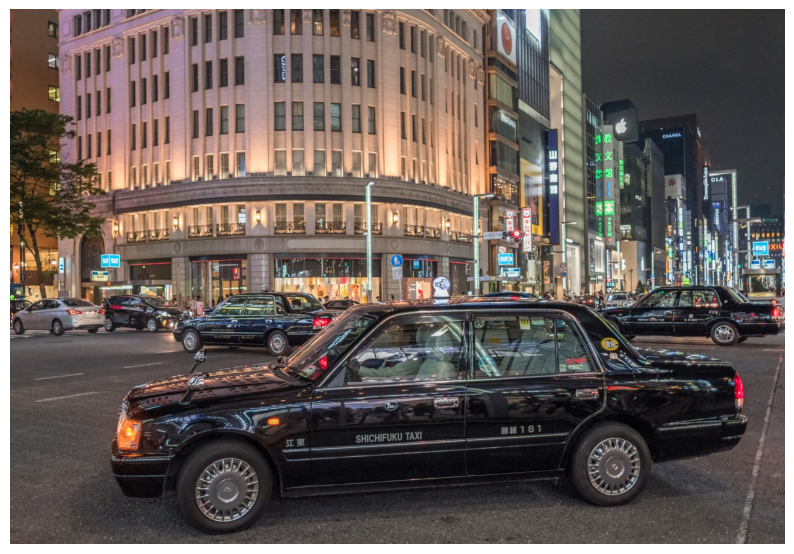

In [154]:
plot_image(image, clip_preprocesed=False)

In [1]:
from densely_captioned_images.dataset.impl import get_complete_dataset_with_settings

# Get images with their descriptions from a specific split
entries = get_complete_dataset_with_settings(
    split='train',  # or 'valid', 'test'
    # load_base_image=True,
    # load_subcaptions=True,
    # count=10  # Optional: limit number of images
)

Loading Dense Caps::   2%|▏         | 135/7599 [00:02<02:24, 51.76it/s]


KeyboardInterrupt: 